# Analysis of Laptop Price from Different Brands

## Imports packages

In [1]:
# importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset and Basic Information

In [13]:
# loading the dataset
laptop_price_data = pd.read_csv('Downloads/laptop_price - dataset.csv')
laptop_price_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
# basic information of dataset
laptop_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

## Summary Statistics

In [4]:
# Some basic statistics at a glance
laptop_price_data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [5]:
# Function for showing summary statistics
def laptop_summary_statistics_preview(laptop_data):
    """
    Generates all summary statistics for this dataset, including descriptive statistics,
    correlation, kurtosis, and skewness.
    """
    # Showing Descriptive Statistics
    print("Descriptive Statistics:\n", laptop_data.describe(include='all'))

    # Keeping only numerical columns for correlation, kurtosis, and skewness
    only_numerical = laptop_data.select_dtypes(include=['float64', 'int64'])

    # Correlation Matrix
    correlation_matrix = only_numerical.corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

    # Kurtosis and Skewness
    kurtosis_values = only_numerical.kurtosis()
    skewness_values = only_numerical.skew()
    print("\nKurtosis Values:\n", kurtosis_values)
    print("\nSkewness Values:\n", skewness_values)

In [6]:
laptop_summary_statistics_preview(laptop_price_data)

Descriptive Statistics:
        Company Product  TypeName       Inches   ScreenResolution CPU_Company  \
count     1275    1275      1275  1275.000000               1275        1275   
unique      19     618         6          NaN                 40           3   
top       Dell  XPS 13  Notebook          NaN  Full HD 1920x1080       Intel   
freq       291      30       707          NaN                505        1214   
mean       NaN     NaN       NaN    15.022902                NaN         NaN   
std        NaN     NaN       NaN     1.429470                NaN         NaN   
min        NaN     NaN       NaN    10.100000                NaN         NaN   
25%        NaN     NaN       NaN    14.000000                NaN         NaN   
50%        NaN     NaN       NaN    15.600000                NaN         NaN   
75%        NaN     NaN       NaN    15.600000                NaN         NaN   
max        NaN     NaN       NaN    18.400000                NaN         NaN   

             C

## Defining Functions that create Scatter Plot, Bar Plot and Heatmap

In [52]:
# Creating function for scatter plot
def ram_price_scatter():
    """
    Creates a scatterplot showing the laptop price according to ram size.
    """
    # creating figure size
    plt.figure(figsize = (8, 6))

    
    # plotting 
    plt.scatter(laptop_price_data['RAM (GB)'], laptop_price_data['Price (Euro)'], color='red', alpha=0.6, edgecolors='k')
    
    
    most_used_ram = [4, 8, 16, 32, 64]
    for i, ram in enumerate(most_used_ram):
        new_data = laptop_price_data[laptop_price_data['RAM (GB)'] == ram]
        plt.scatter(new_data['RAM (GB)'], new_data['Price (Euro)'], label=f'RAM {ram} GB')

    
    plt.title('Laptop price by RAM')
    plt.xlabel('RAM (GB)', fontsize=12)
    plt.ylabel('Price ( Euro)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.savefig('D:/New folder/1.png', dpi=300)
    plt.show()

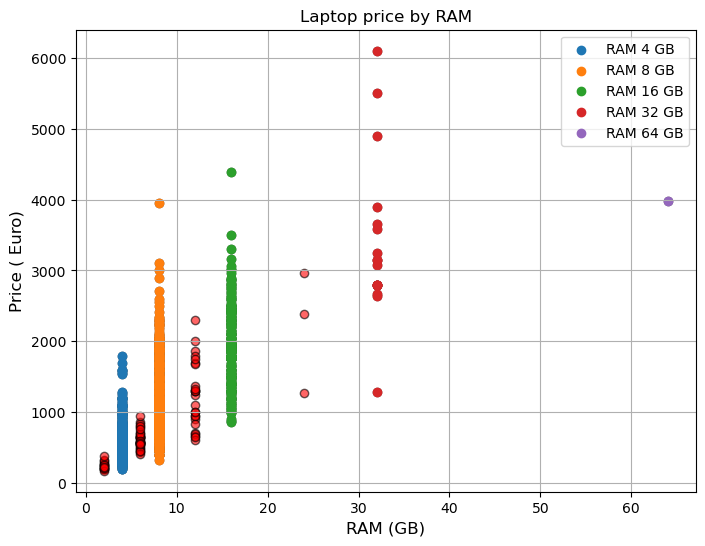

In [53]:
ram_price_scatter()

In [65]:
def company_avg_price_bar(data):
    """
    Plots a bar chart for average laptop price by company with professional styling.
    """
    # Calculate average price by company
    avg_price_by_company = data.groupby('Company')['Price (Euro)'].mean().reset_index()

    
    # Create the bar plot
    plt.figure(figsize=(13, 10))
    sns.barplot(data=avg_price_by_company, x='Company', y='Price (Euro)',hue='Company', dodge=False, palette='viridis', legend=False)
    
    
    # Add labels, title, and styling
    plt.xlabel('Company', fontsize=12)
    plt.ylabel('Average Laptop Price (€)', fontsize=12)
    plt.title('Average Laptop Price by Company', fontsize=12)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, color='black')
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.savefig('D:/New folder/2.png', dpi=300)

    
    # Layout and display
    plt.tight_layout()
    plt.show()

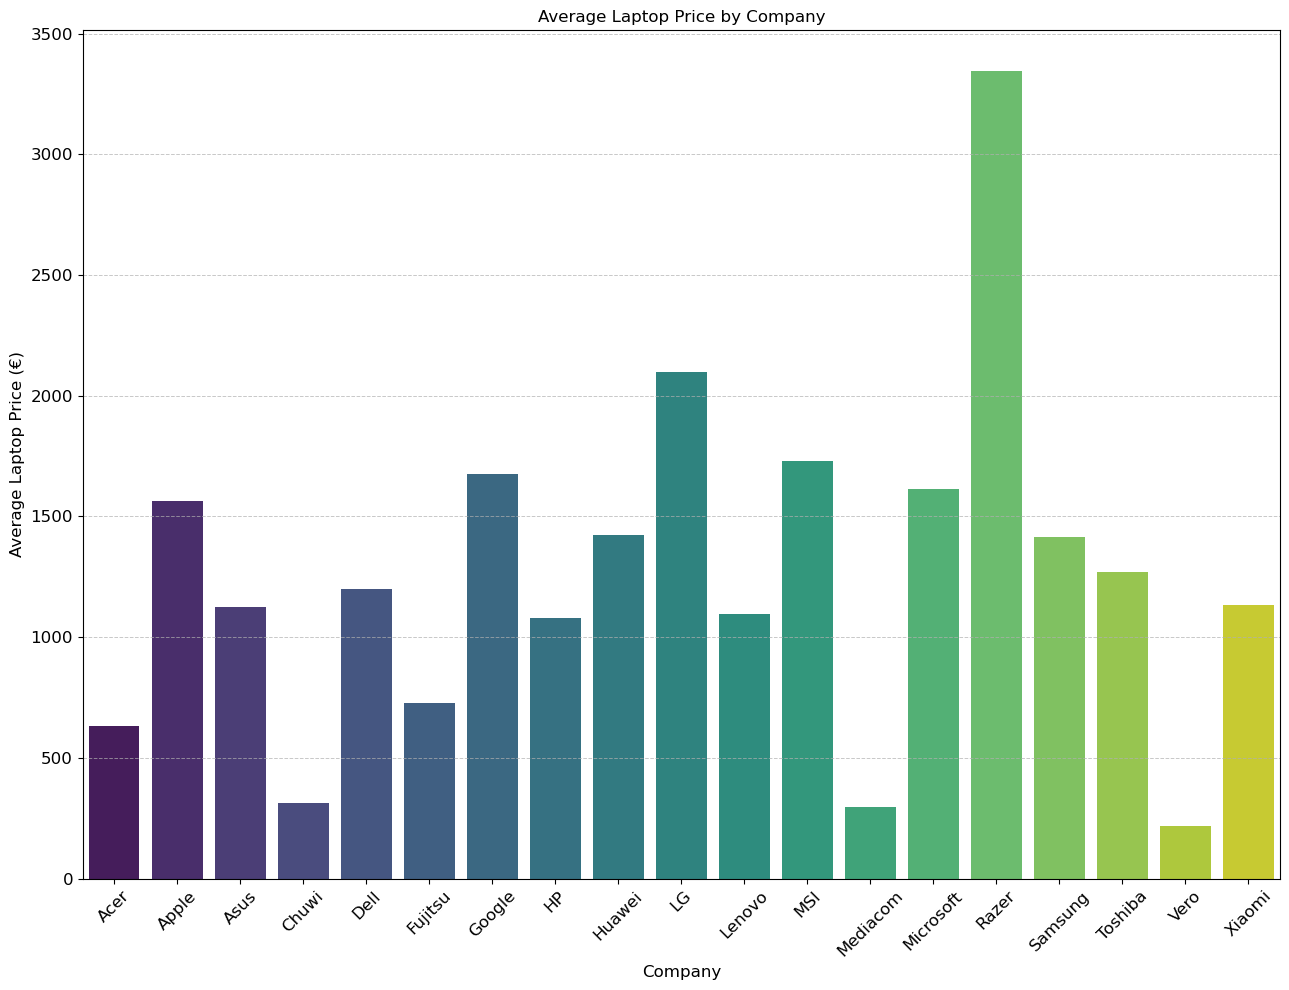

In [66]:
company_avg_price_bar(laptop_price_data)

In [67]:
def laptop_variable_heatmap(raw):
    """
    Plots a heatmap of the correlation matrix for different factors related to laptop price.
    """
    only_numeric = raw.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 8))
    correlation_matrix = only_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, annot_kws={"size": 10})
    plt.title('Corrleation Matrix of Different Types of Laptop Price Data', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('D:/New folder/3.png', dpi=300)
    plt.show()

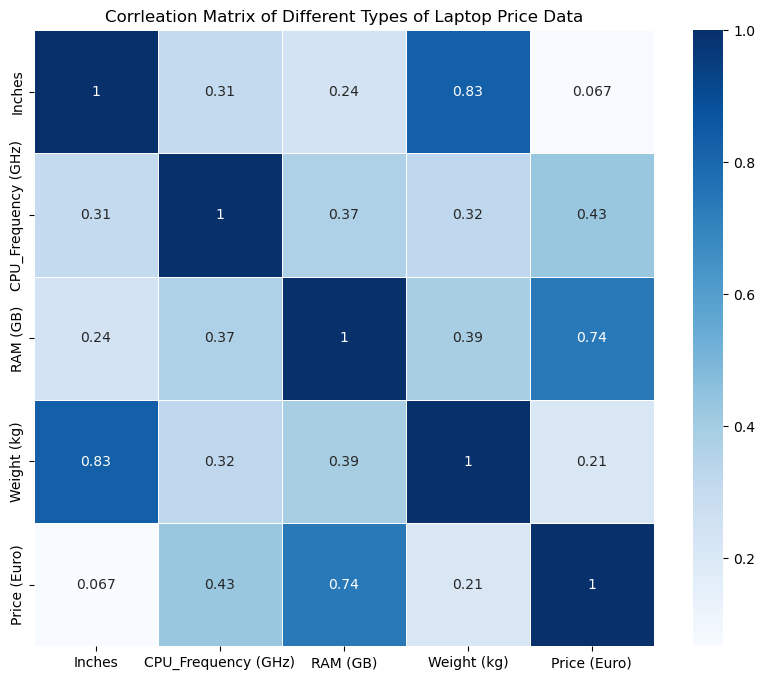

In [68]:
laptop_variable_heatmap(laptop_price_data)

## Clustering and Fitting Technique

In [69]:
# importing necessary libraries
from sklearn.cluster import KMeans
import os
import warnings


# managing warnings
os.environ["OMP_NUM_THREADS"] = "5"  # Set to the required number of threads
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


def laptop_price_clustering(raw):
    """
    Performing k-means clustering on numerical columns of this dataframe.
    """
    # Selecting features for clustering
    clustering_columns = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']
    X = raw[clustering_columns]

    
    # Using Elbow Method to find optimal number of clusters
    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    
    # Plotting line plot using Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), distortions, marker='o', color= 'limegreen')
    plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion (Inertia)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig('D:/New folder/4.png', dpi=300)
    plt.show()

    
    # Performing k-means clustering with the optimal number of clusters (e.g., k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    raw['cluster'] = kmeans.fit_predict(X)

    
    # Plotting scatter plot using clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(raw['CPU_Frequency (GHz)'], raw['Price (Euro)'], c=raw['cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title('K-Means Clustering Results', fontsize=14)
    plt.xlabel('Normalized CPU_Frequency (GHz)', fontsize=12)
    plt.ylabel('Price (Euro)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig('D:/New folder/5.png', dpi=300)
    plt.show()

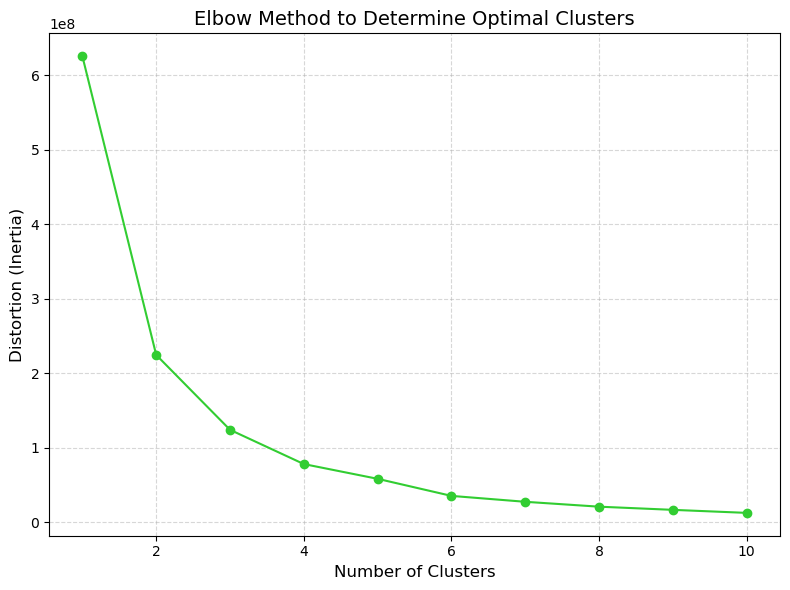

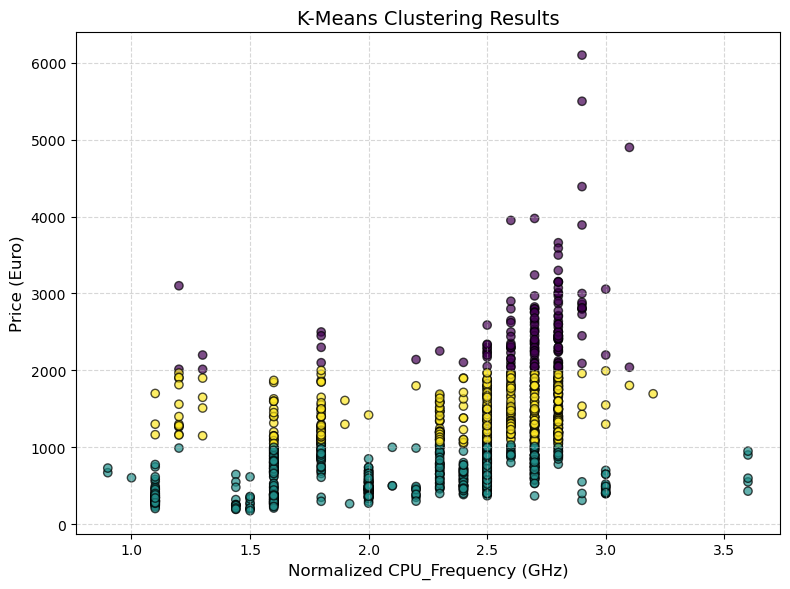

In [70]:
# Calling the function
laptop_price_clustering(laptop_price_data)

In [71]:
# imprting necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def scatter_with_regression(raw):
    """
    Performing linear regression on cpu frequencies and price of laptop.
    """
    # Preparing data for regression
    X = raw[['CPU_Frequency (GHz)']]  # Independent variable
    y = raw['Price (Euro)']  # Dependent variable

    
    # Fitting linear regression model
    model = LinearRegression()
    model.fit(X, y)

    
    # Predict values
    y_pred = model.predict(X)

    
    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label='Data',color='orange', edgecolor='k')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression: CPU_Frequency (GHz) vs Price (Euro)', fontsize=12)
    plt.xlabel('Normalized CPU_Frequency (GHz)', fontsize=12)
    plt.ylabel('Price (Euro)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig('D:/New folder/6.png', dpi=300)
    plt.show()

    
    # Displaying regression metrics
    print(f"Regression Coefficient (Slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_pred):.2f}")
    print(f"R² Score: {r2_score(y, y_pred):.2f}")

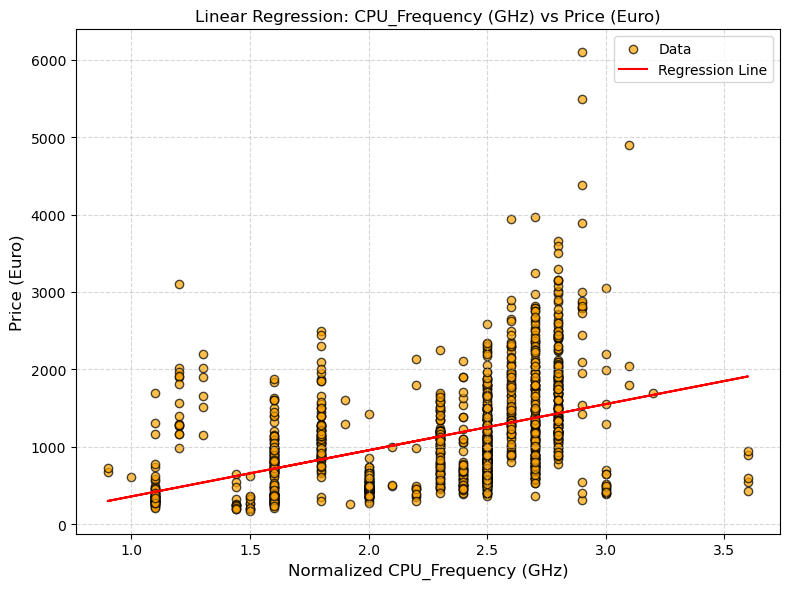

Regression Coefficient (Slope): 596.4440514959927
Intercept: -238.62989679034013
Mean Squared Error (MSE): 400430.03
R² Score: 0.18


In [72]:
# Calling the function
scatter_with_regression(laptop_price_data)

## Future Prediction

In [73]:
# import necessary libraries
from sklearn.linear_model import LinearRegression


def predict_laptop_price(model):
    """
    Use the regression model to predict laptop prices based on future CPU frequencies.
    """
    # Defining future CPU_Frequency (GHz) values (normalized scale: 0 to 1)
    future_frequency = [[0.2], [0.4], [0.6], [0.8], [1.0]]  # Example normalized values

    # Converting future_frequency to a DataFrame with the correct column name
    future_frequency_df = pd.DataFrame(
        future_frequency, columns=['Normalized CPU_Frequency (GHz)']
    )

    # Making predictions
    predictions = model.predict(future_frequency_df)

    # Creating a DataFrame to display predictions
    future_data = pd.DataFrame({
        'Normalized CPU_Frequency (GHz)': future_frequency_df['Normalized CPU_Frequency (GHz)'],
        'Predicted Price (Euro)': predictions.round(2)  # Retain float precision
    })

    print("Future Predictions:")
    print(future_data)

    # Visualizing future predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(
        future_data['Normalized CPU_Frequency (GHz)'], 
        future_data['Predicted Price (Euro)'],
        color='purple', s=100, label='Future Predictions'
    )
    plt.plot(
        future_data['Normalized CPU_Frequency (GHz)'], 
        future_data['Predicted Price (Euro)'],
        color='firebrick', linestyle='--', label='Prediction Trend'
    )
    plt.title('Future Predictions: CPU_Frequency (GHz) vs Price (Euro)', fontsize=14)
    plt.xlabel('Normalized CPU_Frequency (GHz)', fontsize=12)
    plt.ylabel('Predicted Price (Euro)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig('D:/New folder/7.png', dpi=300)
    plt.show()


# Simulatating raw data
raw = pd.DataFrame({
    'CPU_Frequency (GHz)': [1.0, 1.5, 2.0, 2.5, 3.0],
    'Price (Euro)': [600, 700, 800, 900, 1000]
})



# Normalizing the CPU_Frequency column
raw['Normalized CPU_Frequency (GHz)'] = raw['CPU_Frequency (GHz)'] / raw['CPU_Frequency (GHz)'].max()



# Training the regression model
model = LinearRegression()
X = raw[['Normalized CPU_Frequency (GHz)']]  # Independent variable
y = raw['Price (Euro)']  # Dependent variable
model.fit(X, y)

LinearRegression()

Future Predictions:
   Normalized CPU_Frequency (GHz)  Predicted Price (Euro)
0                             0.2                   520.0
1                             0.4                   640.0
2                             0.6                   760.0
3                             0.8                   880.0
4                             1.0                  1000.0


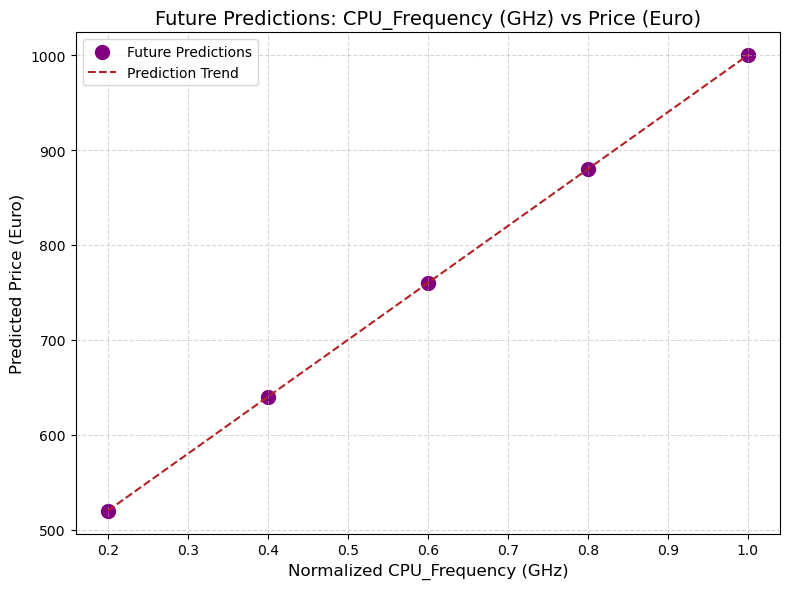

In [74]:
# Call the prediction function
predict_laptop_price(model)